# Clustering


![Clustering algorithms](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)




## Imports

In [1]:
import numpy as np
# plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# evaluation
from sklearn import metrics
# data (artificial)
from sklearn.datasets import make_blobs, make_circles
# data preprocessing
from sklearn.preprocessing import StandardScaler
# Train-test split
from sklearn.model_selection import train_test_split
# clustering algos
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# for jupyter plotting
%matplotlib inline

## Data

Generate 500 points of 2D fake data with 4 clusters.

**Question 1**: What argument controls the dimensionality (i.e. 2D) of the dataset?

In [4]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

# Standardize features to zero mean and unit variance.
X = StandardScaler().fit_transform(X)

### Check the data

**Question 2**: What are ```X``` and ```y```?


**Question 3**: How do we figure out how many examples we have?


**Question 4**: How do we figure out how many features there are in `X`?

In [5]:
X.shape

(500, 2)

Use `plt.scatter()` to the data with ground truth labels. Give the first dimension of `X` (i.e. `X[:, 0]`) as the first argument (`x`) and the second dimension of `X` (i.e. `X[:, 1]`) as the second arugment (`y`).

<!-- **Question 5**: What color does the cluster in the upper right corner of the plot have?  -->


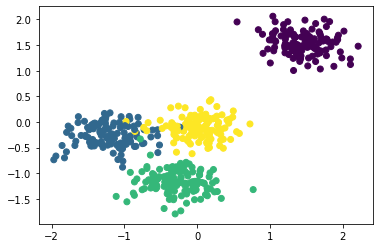

In [9]:
# Plot the data with ground truth labels
plt.scatter(X[:,0], X[:, 1], c=y)

## Cluster with k-means

The main arguments to `sklearn.cluster.KMeans()`:

 - ```n_clusters```: k in **k**-means.
 - ```n_inits```: number of runs with different initializations
 - ```init```: how to initalize the centroids.
 - ```tol```: tolerance, or threshold ratio. I.e. stopping criterion. Roughly: the algo stops when the centroids move less than `tol`.
 - ```random_state```: seed state of the rng
 - ```verbose```: `True` if you want the fitting of print a lot of stuff. False otherwise.

In [10]:
# initialize kmeans
kmeans = KMeans(n_clusters=4,
                n_init=3,
                init='random',
                tol=1e-4,
                random_state=42,
                verbose=True)

Fit the model to the data.

<!-- **Question 6**: What is the last line of the output printed by the fitting? -->

In [12]:
# fit to data
kmeans.fit(X)

Initialization complete
Iteration 0, inertia 1335.9004637656326
Iteration 1, inertia 416.874134737343
Iteration 2, inertia 241.7126037898717
Iteration 3, inertia 101.49145371982945
Iteration 4, inertia 66.60791625950449
Iteration 5, inertia 64.69191832367008
Iteration 6, inertia 64.63589563600755
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 687.3362715914685
Iteration 1, inertia 149.65128333303852
Iteration 2, inertia 89.89550813883503
Iteration 3, inertia 65.65276664595257
Iteration 4, inertia 64.63589563600755
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 176.17779278226993
Iteration 1, inertia 78.05336077665646
Iteration 2, inertia 65.46294117416824
Iteration 3, inertia 64.64211146652471
Converged at iteration 3: center shift 4.975726162111657e-05 within tolerance 9.999999999999996e-05.


KMeans(init='random', n_clusters=4, n_init=3, random_state=42, verbose=True)

**Question 5**: Where is the model (i.e. what attribute of `kmeans` holds the cluster centers).

Print the model.

In [15]:
kmeans.cluster_centers_

array([[ 0.0328524 , -0.1120338 ],
       [-0.27709885, -1.17219561],
       [ 1.45785578,  1.53881252],
       [-1.20371678, -0.25345176]])

Plot the clusters labeled by the model and the cluster centroids.

<!-- **Question 8**: Copy and paste the image as answer on Canvas. -->

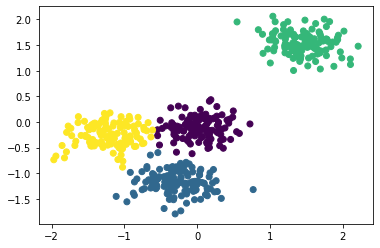

In [21]:
# Plot the clusters labeled by the model.
kmeans.labels_.shape

np.unique(kmeans.labels_)

plt.scatter(X[:,0], X[:, 1], c=kmeans.labels_)

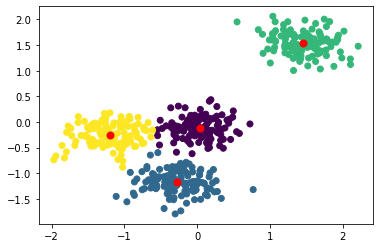

In [23]:
# Plot the cluster centroids on top with a round marker, red color and linewidth=2.
plt.scatter(X[:,0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], c='r', linewidth=2)

## Find the best number of clusters

In [24]:
X, y = make_blobs(n_samples=1500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

# Standardize features to zero mean and unit variance.
X = StandardScaler().fit_transform(X)

**Question 6**: What type of parameter is k?

**Question 7**: what is the below method for finding the best k called?

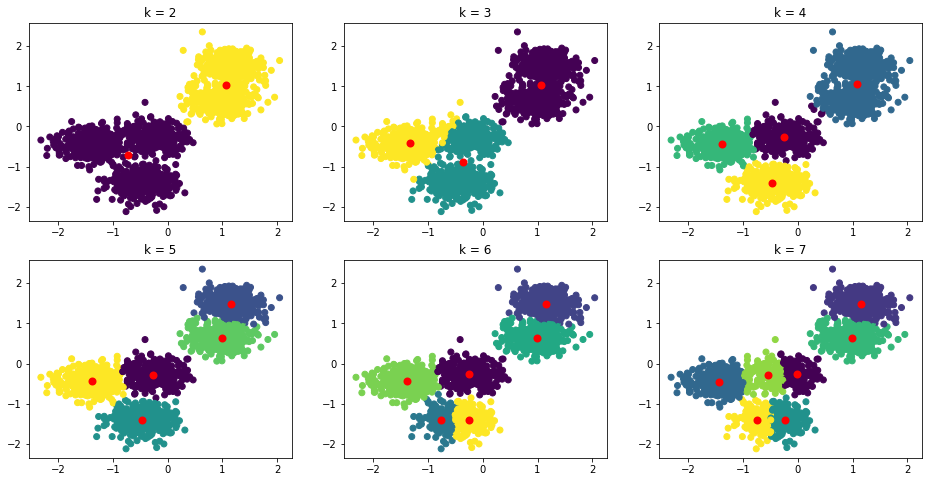

In [26]:
range_k = [2, 3, 4, 5, 6, 7]
s_mean = []

fig = plt.figure(figsize=[16,8])

for i, k in enumerate(range_k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)
    
    s = metrics.silhouette_samples(X, y_pred)
    s_mean.append(s.mean())
    
    ax = fig.add_subplot(2,3, i+1)
    ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
    ax.scatter(kmeans.cluster_centers_[:,0], 
               kmeans.cluster_centers_[:,1], 
               c='r', marker='o', lw=2)
    ax.set_title('k = %d' % k)

Plot the mean silhouette scores.

<!-- **Question 9**: Copy the image and paste it as an answer on Canvas. -->

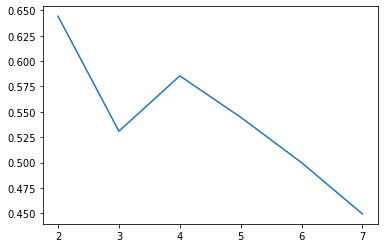

In [28]:
plt.plot(range_k, s_mean)

**Question 8**: What is the optimal number of clusters?

## GMM

### Evaluate on training data

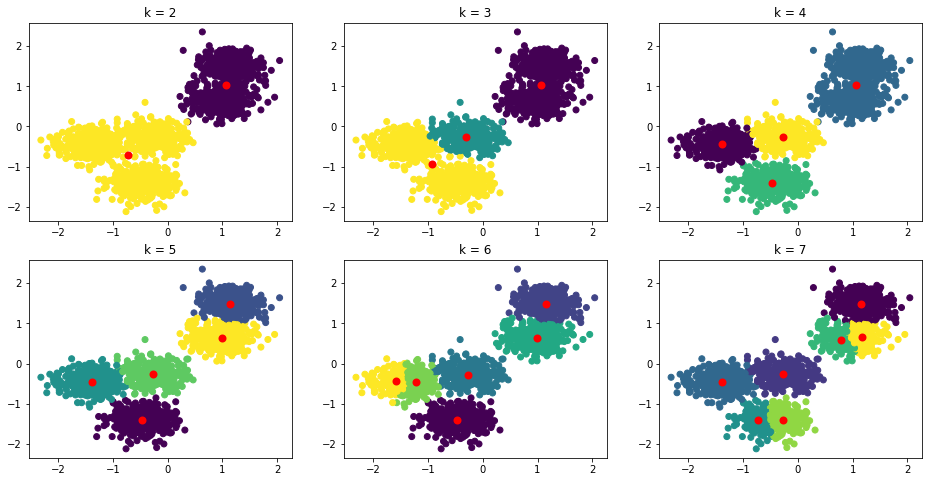

In [29]:
range_k = [2, 3, 4, 5, 6, 7]
bic = []

fig = plt.figure(figsize=[16,8])

for i, k in enumerate(range_k):
    gmm = GaussianMixture(n_components=k, covariance_type='full')
    gmm.fit(X)
    bic.append(gmm.bic(X))

    
    ax = fig.add_subplot(2,3, i+1)
    ax.scatter(X[:,0], X[:,1], c=gmm.predict(X))
    ax.scatter(gmm.means_[:,0], 
               gmm.means_[:,1], 
               c='r', marker='o', lw=2)
    ax.set_title('k = %d' % k)

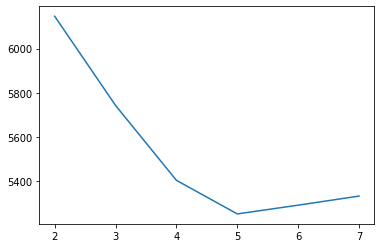

In [30]:
plt.plot(range_k, bic)

### Cross-validation

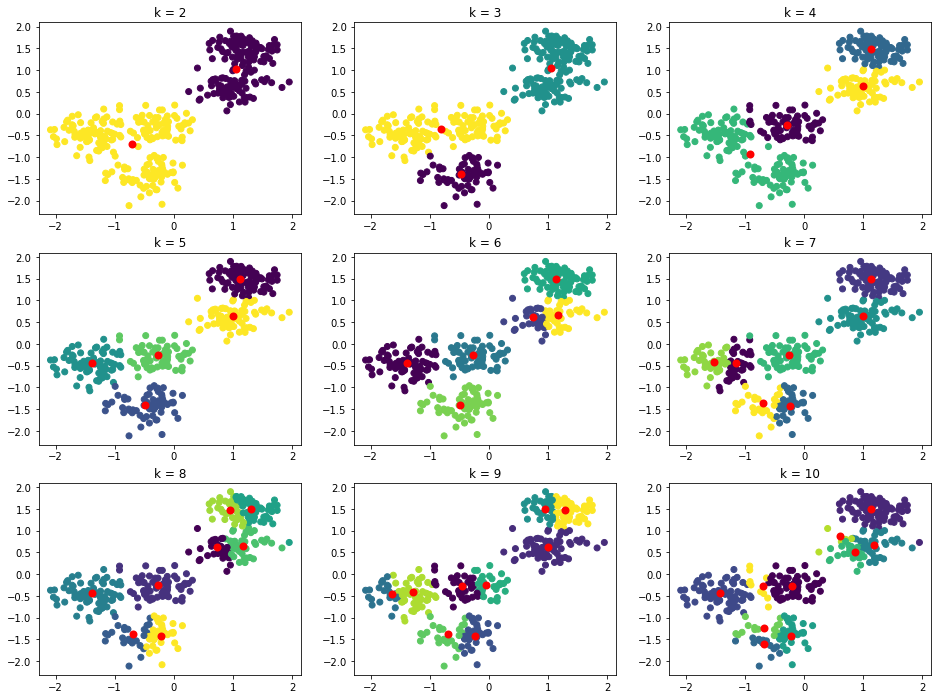

In [32]:
range_k = [2, 3, 4, 5, 6, 7, 8, 9, 10]
bic_valid = []
bic_train = []

X_train, X_valid = train_test_split(X)

fig = plt.figure(figsize=[16,12])

for i, k in enumerate(range_k):
    gmm = GaussianMixture(n_components=k, covariance_type='full')
    gmm.fit(X_train)
    bic_valid.append(gmm.bic(X_valid))
    bic_train.append(gmm.bic(X_train))

    
    ax = fig.add_subplot(3,3, i+1)
    ax.scatter(X_valid[:,0], X_valid[:,1], c=gmm.predict(X_valid))
    ax.scatter(gmm.means_[:,0], 
               gmm.means_[:,1], 
               c='r', marker='o', lw=2)
    ax.set_title('k = %d' % k)

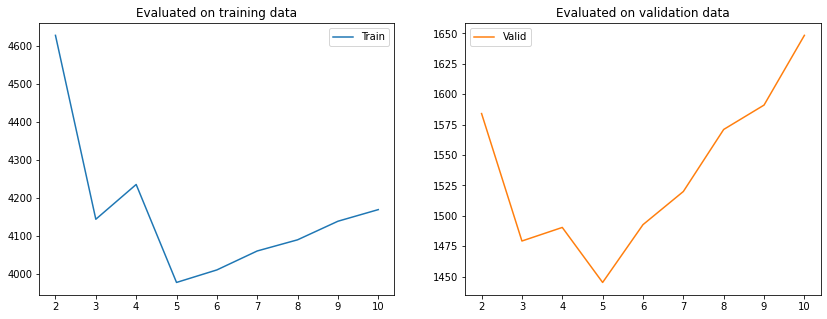

In [33]:
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(121)
ax.plot(range_k, bic_train, c='tab:blue', label='Train')
ax.set_title('Evaluated on training data')
ax.legend()
ax = fig.add_subplot(122)
ax.plot(range_k, bic_valid, c='tab:orange', label='Valid')
ax.set_title('Evaluated on validation data')
ax.legend()

## Non-spherical data

In [34]:
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1)
# Standardize features to zero mean and unit variance.
X = StandardScaler().fit_transform(X)

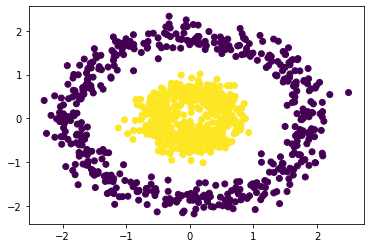

In [35]:
plt.scatter(X[:,0], X[:,1], c=y)

### k-means on non-spherical data

Initialization complete
Iteration 0, inertia 2180.4001469103905
Iteration 1, inertia 1478.975757730321
Iteration 2, inertia 1438.456558864271
Iteration 3, inertia 1400.8857261665335
Iteration 4, inertia 1382.9817835972367
Iteration 5, inertia 1371.2515737568508
Iteration 6, inertia 1367.1444867219086
Iteration 7, inertia 1366.0854161092234
Iteration 8, inertia 1365.5467154324947
Iteration 9, inertia 1365.2067573505278
Iteration 10, inertia 1364.9961335286612
Iteration 11, inertia 1364.8472399249647
Converged at iteration 11: center shift 8.167098610511233e-05 within tolerance 0.00010000000000000005.


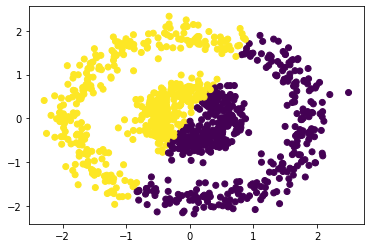

In [37]:
# initialize kmeans
kmeans = KMeans(n_clusters=2,
                n_init=1,
                init='random',
                tol=1e-4,
                random_state=42,
                verbose=True)
# fit to data
kmeans.fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)

**Question 8**: Does k-means find good clusters?


Use ```DBSCAN``` on the circles data and plot the figure.

**Question 9**: Does it perform better than k-means?


In [38]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
# 1. Fit the model
# 2. Predict
# 3. Plot clusters colored by predictions

[-1  0  1]


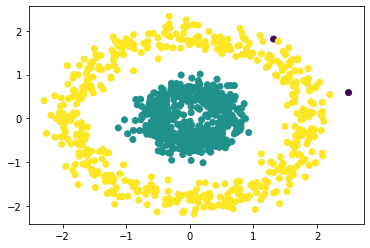

In [40]:
y_pred = dbscan.fit_predict(X)
print(np.unique(y_pred))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)